In [1]:
import os
os.chdir('..')
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.io.shapereader import Reader
import numpy as np
from notebooks import config
import geopandas as gpd
from utils.geotif_io import readTiff
from utils.imgShow import imgShow
from utils.raster_vec import vec2mask
from matplotlib.colors import LinearSegmentedColormap


### Tibet sentinel-1 image check

In [4]:
path_tibet_shp =  config.root_proj + '/data/tibet/tibet-plateau-boundary/TPBoundary_HF/TPBoundary_HF_wgs84.shp'
path_tibet_water = config.root_proj + '/data/tibet/tibet_result/tb_tiles_stat.shp'


In [6]:
geodf_tibet_water = gpd.read_file(path_tibet_water)
geodf_tibet = gpd.read_file(path_tibet_shp)
geodf_tibet_water.head(1)
print(geodf_tibet_water.columns)

Index(['01_wat_per', '02_wat_per', '12_wat', '03_wat', '09_wat', '06_wat_per',
       '05_wat_per', '08_wat', '04_wat_per', '04_wat', '03_wat_per', '01_wat',
       '10_wat', '10_wat_per', 'tile_id', '07_wat', '99_wat_std', '05_wat',
       '07_wat_per', '11_wat', '08_wat_per', '02_wat', '11_wat_per',
       '12_wat_per', 'tile_area', '09_wat_per', '06_wat', 'geometry'],
      dtype='object')


### Monthly surface water visualization

Text(0.06, 0.09, 'Std')

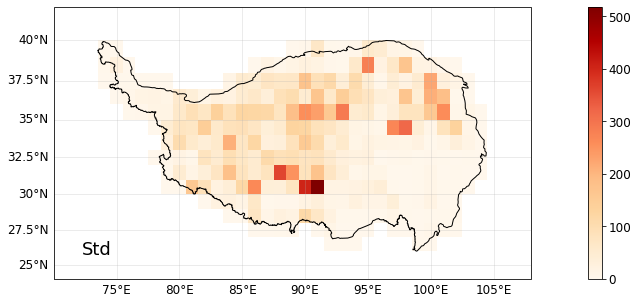

In [14]:

crs_1 = ccrs.Mercator(central_longitude=89)
crs_2 = ccrs.epsg('3857')
plt.rcParams.update({'font.size': 12})
cmap_num = LinearSegmentedColormap.from_list('linear color', ["CornflowerBlue", 'Wheat', "Firebrick"])
fig = plt.figure(figsize=(16, 5))
ax_1 = fig.add_subplot(1, 1, 1, projection=crs_2)
ax_1.set_extent([70, 108, 24.0, 42.0])
ax_1.add_geometries(geodf_tibet.to_crs(epsg=3857)['geometry'], crs=crs_2, facecolor='none', edgecolor='black' )
ax_1 = geodf_tibet_water.to_crs(epsg=3857).plot(column='99_wat_std', ax=ax_1, \
                                  legend=True, legend_kwds={'anchor': (0.1, 0.5)}, cmap='OrRd');
grid = ax_1.gridlines(draw_labels=True, linewidth=0.5, alpha=0.5, zorder=1)
grid.xlabels_top = False
grid.ylabels_right = False

ax_1.text(0.06, 0.09, 'Std', fontsize=18, transform=ax_1.transAxes)


Text(0.06, 0.09, 'Dec.')

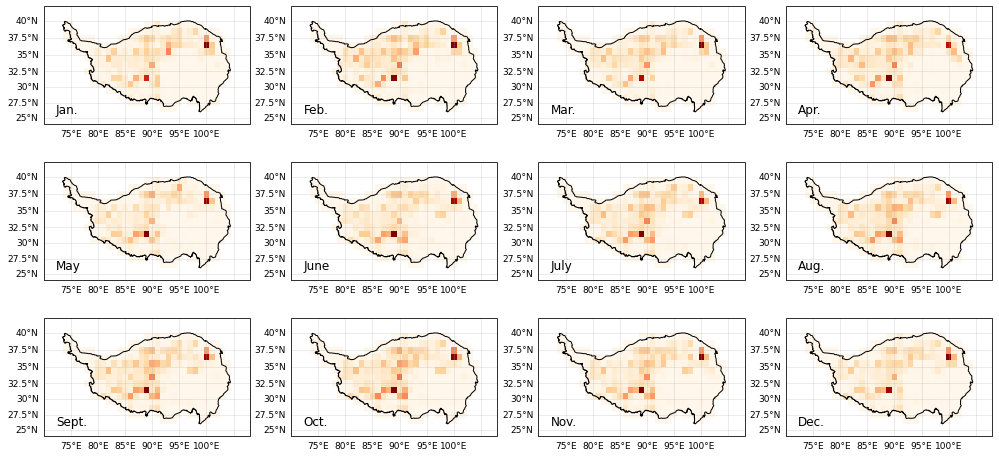

In [178]:
crs_2 = ccrs.epsg('3857')
plt.rcParams.update({'font.size': 9})

def plot_wat_map(geodf_tibet=geodf_tibet, geodf_tibet_water=geodf_tibet_water, ax=None, col='01_wat_per'):
  ax.set_extent([70, 108, 24.0, 42.0])
  ax.add_geometries(geodf_tibet.to_crs(epsg=3857)['geometry'], crs=crs_2, facecolor='none', edgecolor='black' )
  ax = geodf_tibet_water.to_crs(epsg=3857).plot(column=col, ax=ax, \
                                    legend=False, legend_kwds={'anchor': (0.3, 0.5)}, cmap='OrRd');
  grid = ax.gridlines(draw_labels=True, linewidth=0.5, alpha=0.5, zorder=1)
  grid.xlabels_top = False
  grid.ylabels_right = False


fig = plt.figure(figsize=(17, 11))
ax_1 = fig.add_subplot(4, 4, 1, projection=crs_2)
plot_wat_map(ax=ax_1, col='01_wat_per')
ax_1.text(0.06, 0.09, 'Jan.', fontsize=12, transform=ax_1.transAxes)
ax_2 = fig.add_subplot(4, 4, 2, projection=crs_2)
plot_wat_map(ax=ax_2, col='02_wat_per')
ax_2.text(0.06, 0.09, 'Feb.', fontsize=12, transform=ax_2.transAxes)
ax_3 = fig.add_subplot(4, 4, 3, projection=crs_2)
plot_wat_map(ax=ax_3, col='03_wat_per')
ax_3.text(0.06, 0.09, 'Mar.', fontsize=12, transform=ax_3.transAxes)
ax_4 = fig.add_subplot(4, 4, 4, projection=crs_2)
plot_wat_map(ax=ax_4, col='04_wat_per')
ax_4.text(0.06, 0.09, 'Apr.', fontsize=12, transform=ax_4.transAxes)

ax_5 = fig.add_subplot(4, 4, 5, projection=crs_2)
plot_wat_map(ax=ax_5, col='05_wat_per')
ax_5.text(0.06, 0.09, 'May', fontsize=12, transform=ax_5.transAxes)
ax_6 = fig.add_subplot(4, 4, 6, projection=crs_2)
plot_wat_map(ax=ax_6, col='06_wat_per')
ax_6.text(0.06, 0.09, 'June', fontsize=12, transform=ax_6.transAxes)
ax_7 = fig.add_subplot(4, 4, 7, projection=crs_2)
plot_wat_map(ax=ax_7, col='07_wat_per')
ax_7.text(0.06, 0.09, 'July', fontsize=12, transform=ax_7.transAxes)
ax_8 = fig.add_subplot(4, 4, 8, projection=crs_2)
plot_wat_map(ax=ax_8, col='08_wat_per')
ax_8.text(0.06, 0.09, 'Aug.', fontsize=12, transform=ax_8.transAxes)

ax_9 = fig.add_subplot(4, 4, 9, projection=crs_2)
plot_wat_map(ax=ax_9, col='09_wat_per')
ax_9.text(0.06, 0.09, 'Sept.', fontsize=12, transform=ax_9.transAxes)
ax_10 = fig.add_subplot(4, 4, 10, projection=crs_2)
plot_wat_map(ax=ax_10, col='10_wat_per')
ax_10.text(0.06, 0.09, 'Oct.', fontsize=12, transform=ax_10.transAxes)
ax_11 = fig.add_subplot(4, 4, 11, projection=crs_2)
plot_wat_map(ax=ax_11, col='11_wat_per')
ax_11.text(0.06, 0.09, 'Nov.', fontsize=12, transform=ax_11.transAxes)
ax_12 = fig.add_subplot(4, 4, 12, projection=crs_2)
plot_wat_map(ax=ax_12, col='12_wat_per')
ax_12.text(0.06, 0.09, 'Dec.', fontsize=12, transform=ax_12.transAxes)

